# Logistic Regression

In [1]:
%pylab inline
import scipy.optimize as op
import doctest

Populating the interactive namespace from numpy and matplotlib


In [2]:
!head -n 5 ex2data1.txt

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1


## Load Data

In [3]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:,:-1]
y = data[:,-1].reshape((-1,1))
X_pos = X[y[:,0] == 1]
X_neg = X[y[:,0] == 0]

## Plot Data

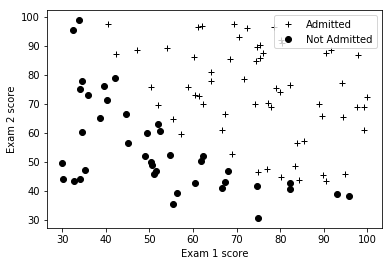

In [4]:
def plot_data(X_pos,X_neg):
    plt.plot(*X_pos.T,'k+',label='Admitted')
    plt.plot(*X_neg.T,'ko',label='Not Admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc=1);

plot_data(X_pos,X_neg)

## Insert Bias Feature

In [5]:
def insert_bias_feature(X):
    """Insert a column filled with ones in front of an unbiased array of features.
    
    The new column is inserted at index ``0`` on axis ``1``.
    
    Parameters
    ----------
    X : array_like
        Input array.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``
        before the new column insertion.
        
    Returns
    -------
    numpy.ndarray
        Output array.
        If `X` has ``(m,n)`` shape, the return value will have ``(m,n+1)``shape.
        
    Examples
    --------
    >>> x = np.array([[2,3],[4,5],[6,7]])
    >>> insert_bias_feature(x)
    array([[1, 2, 3],
           [1, 4, 5],
           [1, 6, 7]])
     
    >>> x = np.array([[2],[3],[4]])
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
     
    >>> x = [2,3,4]
    >>> insert_bias_feature(x)
    array([[1, 2],
           [1, 3],
           [1, 4]])
    """
    if np.ndim(X) == 1:
        X = np.reshape(X, (-1,1))
        
    return np.insert(X,0,1,axis=1)

## Initialize Theta

In [6]:
def initialize_theta(shape, order='C'):
    """Return a new array of given shape, filled with `numpy.float64` zeros.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    order : {'C', 'F'}, optional
        Whether to store multidimensional data in C- or Fortran-contiguous
        (row- or column-wise) order in memory.
        
    Returns
    -------
    numpy.ndarray
        Array of `numpy.float64` zeros with the given shape and order.
    
    Examples
    --------
    >>> initialize_theta(5)
    array([0., 0., 0., 0., 0.])
    
    >>> initialize_theta((5,))
    array([0., 0., 0., 0., 0.])
    
    >>> initialize_theta((2, 1))
    array([[0.],
           [0.]])
    
    >>> initialize_theta((2,2))
    array([[0., 0.],
           [0., 0.]])
    """
    return np.zeros(shape)

## Sigmoid Function

In [7]:
def sigmoid(z):
    '''Compute the sigmoid function.
    
    Parameters
    ----------
    z : array_like
        Input data.
        
    Returns
    -------
    numpy.ndarray
        Element-wise ``sigmoid(z)``, of the same shape and dtype as `x`.
        Returns scalar if `x` is a scalar.
        
    Examples
    --------
    >>> sigmoid(0)
    0.5
    
    >>> sigmoid([-1,1])
    array([0.26894142, 0.73105858])

    >>> sigmoid(np.array([-1,1e2]))
    array([0.26894142, 1.        ])
    '''
    return 1 / (1 + np.exp(np.negative(z)))

## Cost Function

In [8]:
def logistic_loss(theta,X,y):
    """Compute logistic regression cost from unbiased examples.

    Parameters
    ----------
    theta : array_like
        Parameters (weights) of the model, including the bias parameter.
        If `theta` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)```.
        
    Returns
    -------
    J : numpy.float64
        Cost value.
    
    Examples
    --------
    >>> t = [[0],[0],[0]]
    >>> x = [[67.37202755, 42.83843832],
    ...      [89.67677575, 65.79936593],
    ...      [50.53478829, 48.85581153],
    ...      [34.21206098, 44.2095286 ],
    ...      [77.92409145, 68.97235999]]
    >>> y = [[0],[1],[0],[0],[1]]
    >>> logistic_loss(t,x,y)
    0.6931471805599453
    
    >>> t = [0,0,0]
    >>> x = [[67.37202755, 42.83843832],
    ...      [89.67677575, 65.79936593],
    ...      [50.53478829, 48.85581153],
    ...      [34.21206098, 44.2095286 ],
    ...      [77.92409145, 68.97235999]]
    >>> y = [0,1,0,0,1]
    >>> logistic_loss(t,x,y)
    0.6931471805599453
    """
    if np.ndim(theta) == 1:
        theta = np.reshape(theta,(-1,1))
    if np.ndim(y) == 1:
        y = np.reshape(y, (-1,1))
    else:
        y = np.array(y)
        
    X_biased = insert_bias_feature(X)
    z = X_biased @ theta
    a = sigmoid(z)
    J = (1/len(y)) * ((-y).T @ log(a) - (1-y).T @ log(1-a))
    return np.sum(J)

## Gradient Function

In [9]:
def logistic_gradient(theta,X,y):
    """Compute logistic regression gradient from unbiased features.

    Parameters
    ----------
    theta : array_like
        Parameters (weights) of the model, including the bias parameter.
        If `theta` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)```.
        
    Returns
    -------
    J : numpy.float64
        Cost gradient.
    
    Examples
    --------
    >>> t = [[0],[0],[0]]
    >>> x = [[67.37202755, 42.83843832],
    ...      [89.67677575, 65.79936593],
    ...      [50.53478829, 48.85581153],
    ...      [34.21206098, 44.2095286 ],
    ...      [77.92409145, 68.97235999]]
    >>> y = [[0],[1],[0],[0],[1]]
    >>> logistic_gradient(t,x,y)
    array([ 0.1       , -1.54819904,  0.11320525])
    
    >>> t = [0,0,0]
    >>> x = [[67.37202755, 42.83843832],
    ...      [89.67677575, 65.79936593],
    ...      [50.53478829, 48.85581153],
    ...      [34.21206098, 44.2095286 ],
    ...      [77.92409145, 68.97235999]]
    >>> y = [0,1,0,0,1]
    >>> logistic_gradient(t,x,y)
    array([ 0.1       , -1.54819904,  0.11320525])
    """
    if np.ndim(theta) == 1:
        theta = np.reshape(theta,(-1,1))
    if np.ndim(y) == 1:
        y = np.reshape(y, (-1,1))
        
    X_biased = insert_bias_feature(X)
    z = X_biased @ theta
    a = sigmoid(z)
    D = (1/len(y)) * X_biased.T @ (a-y)
    return D.squeeze()

## Gradient Descent

In [17]:
def logistic_gradient_descent(X,y,method='tnc'):
    """Minimize logistic loss from unbiased examples using gradient descent method.
        
    It uses the `minimize` function from `scipy.optimize` as an optimizer,
    with 'tnc' as default method.
    
    Parameters
    ----------
    X : array_like
        Input examples.
        The input array must not include the bias column.
        If `X` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    y : array_like
        Output examples.
        If `y` is a 1-D array of shape ``(m,)``, it will be reshaped to ``(m,1)``.
    method : str or callable, optional
        Type of solver.  Should be one of `scipy.optimize.minimize` solvers.
        Default to 'tnc'.
        
    Returns
    -------
    theta : numpy.ndarray
        The model's parameters (weights).
    
    Examples
    --------
    >>> x = [[67.37202755, 42.83843832],
    ...      [89.67677575, 65.79936593],
    ...      [50.53478829, 48.85581153],
    ...      [34.21206098, 44.2095286 ],
    ...      [77.92409145, 68.97235999]]
    >>> y = [[0],[1],[0],[0],[1]]
    >>> logistic_gradient_descent(x,y)
    array([-78.56057718,   0.32265913,   0.98440437])
    
    >>> x = [[67.37202755, 42.83843832],
    ...      [89.67677575, 65.79936593],
    ...      [50.53478829, 48.85581153],
    ...      [34.21206098, 44.2095286 ],
    ...      [77.92409145, 68.97235999]]
    >>> y = [0,1,0,0,1]
    >>> logistic_gradient_descent(x,y)
    array([-78.56057718,   0.32265913,   0.98440437])
    """
    m, n = np.shape(X)
    initial_theta = initialize_theta((n+1,1))
    result = op.minimize(fun=logistic_loss, x0=initial_theta, args=(X,y), method=method, jac=logistic_gradient)
    theta = result.x
    return theta

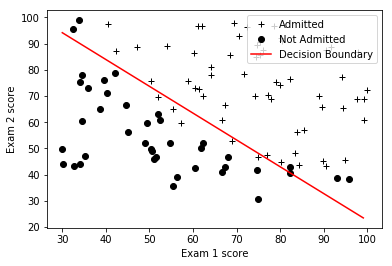

In [11]:
def plot_gradient_descent(X,y):
    theta = logistic_gradient_descent(X,y)
    x_fit = np.arange(X[:,0].min(), X[:,0].max())
    y_fit = -(theta[0] + theta[1]*x_fit)/theta[2] # ax+by+c=0 --> y=-(c + ax)/b
    
    plt.plot(*X_pos.T, 'k+', label='Admitted')
    plt.plot(*X_neg.T, 'ko', label='Not Admitted')
    plt.plot(x_fit, y_fit, 'r-', label='Decision Boundary') 
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(loc=1);

plot_gradient_descent(X,y)

## Predict with Logistic Regression

In [12]:
def make_prediction(X,y,xs):
    theta = logistic_gradient_descent(X,y)
    xs_biased = insert_bias_feature(xs)
    z = xs_biased @ theta.reshape((-1,1))
    ys = sigmoid(z)
    print(f'For a student with Exam1 score of {xs[0,0]} and Exam2 score of {xs[0,1]}, '
          f'the probability of admission is {ys[0,0] * 100:.2f}%')
    
make_prediction(X,y,xs=np.array([[45,85]]))

For a student with Exam1 score of 45 and Exam2 score of 85, the probability of admission is 77.63%


## Prediction Accuracy

In [13]:
def compute_model_accuracy(X,y):
    theta = logistic_gradient_descent(X,y)
    X_biased = insert_bias_feature(X)
    z = X_biased @ theta
    accuracy = np.mean((z >= 0) == y.flatten())
    print(f'The classifier has an accuracy of {accuracy * 100:.2f}%')

compute_model_accuracy(X,y)

The classifier has an accuracy of 89.00%


## Unit Tests

In [14]:
doctest.testmod()

TestResults(failed=0, attempted=35)

In [15]:
# set the file name (required)
__file__ = 'ex2.ipynb'

# add ipython magics
import ipytest.magics
import pytest

In [18]:
%%run_pytest[clean] -qq -v

def test_insert_bias_feature():
    ipytest.assert_equals(insert_bias_feature([[2,3], [4,5], [6,7]]),
                          np.array([[1, 2, 3], [1, 4, 5], [1, 6, 7]]))
    ipytest.assert_equals(insert_bias_feature(np.array([[2],[3],[4]])),
                          np.array([[1, 2], [1, 3], [1, 4]]))
    ipytest.assert_equals(insert_bias_feature([2,3,4]),
                          np.array([[1, 2], [1, 3], [1, 4]]))

def test_initialize_theta():
    ipytest.assert_equals(initialize_theta(5), np.array([0., 0., 0., 0., 0.]))
    ipytest.assert_equals(initialize_theta((5,)), np.array([0., 0., 0., 0., 0.]))
    ipytest.assert_equals(initialize_theta((2, 1)), np.array([[0.], [0.]]))
    ipytest.assert_equals(initialize_theta((2,2)), np.array([[0., 0.], [0., 0.]]))
    
def test_sigmoid():
    ipytest.assert_equals(sigmoid(0), 0.5)
    ipytest.assert_equals(sigmoid([-1,1]), np.array([0.26894142, 0.73105858]))
    ipytest.assert_equals(sigmoid(np.array([-1,1e2])), np.array([0.26894142, 1.]))
    
def test_logistic_loss():
    ipytest.assert_equals(logistic_loss(
        theta=[[0],[0],[0]],
        X=[[67.37202755, 42.83843832],
           [89.67677575, 65.79936593],
           [50.53478829, 48.85581153],
           [34.21206098, 44.2095286 ],
           [77.92409145, 68.97235999]],
        y=[[0],[1],[0],[0],[1]]), 0.6931471805599453)
    ipytest.assert_equals(logistic_loss(
        theta=[0,0,0],
        X=[[67.37202755, 42.83843832],
           [89.67677575, 65.79936593],
           [50.53478829, 48.85581153],
           [34.21206098, 44.2095286 ],
           [77.92409145, 68.97235999]],
        y=[0,1,0,0,1]), 0.6931471805599453)

def test_logistic_gradient():
    ipytest.assert_equals(logistic_gradient(
        theta=[[0],[0],[0]],
        X=[[67.37202755, 42.83843832],
           [89.67677575, 65.79936593],
           [50.53478829, 48.85581153],
           [34.21206098, 44.2095286 ],
           [77.92409145, 68.97235999]],
        y=[[0],[1],[0],[0],[1]]),
        np.array([0.1, -1.54819904, 0.11320525]))
    ipytest.assert_equals(logistic_gradient(
        theta=[0,0,0],
        X=[[67.37202755, 42.83843832],
           [89.67677575, 65.79936593],
           [50.53478829, 48.85581153],
           [34.21206098, 44.2095286 ],
           [77.92409145, 68.97235999]],
        y=[0,1,0,0,1]),
        np.array([0.1, -1.54819904, 0.11320525]))
    
def test_logistic_gradient_descent():
    ipytest.assert_equals(logistic_gradient_descent(
        X=[[67.37202755, 42.83843832],
           [89.67677575, 65.79936593],
           [50.53478829, 48.85581153],
           [34.21206098, 44.2095286 ],
           [77.92409145, 68.97235999]],
        y=[[0],[1],[0],[0],[1]]),
        np.array([-78.56057718,   0.32265913,   0.98440437]))
    ipytest.assert_equals(logistic_gradient_descent(
        X=[[67.37202755, 42.83843832],
           [89.67677575, 65.79936593],
           [50.53478829, 48.85581153],
           [34.21206098, 44.2095286 ],
           [77.92409145, 68.97235999]],
        y=[0,1,0,0,1]),
        np.array([-78.56057718,   0.32265913,   0.98440437]))

......                                                                                                                                                                                               [100%]
6 passed in 0.09 seconds
